In [13]:
import glob
import os 
import numpy as np
import matplotlib.pyplot as plt

from monai.transforms import (
    EnsureChannelFirstd,
    LoadImage,
    LoadImaged,
    Orientationd,
    Rand3DElasticd,
    RandAffined,
    Spacingd,
)

In [2]:
data_root_dir = '/var/data/MONAI_Choroid_Plexus'
data_dir = os.path.join(data_root_dir, 'dataset_aschoplex')

In [15]:
data_root_dir = "/var/data/MONAI_Choroid_Plexus/ANON_DATA_01_labels/0"
train_img = os.path.join(data_root_dir, "T1.nii")
train_seg = os.path.join(data_root_dir, "mask.nii")
data_dict = [{"image": train_img, "label": train_seg}]

In [18]:
loader = LoadImaged(keys=("image", "label"), image_only=False)
d_dict = loader(data_dict[0])
# print(f"input:, {train_data_dicts[0]}")
print(f"image shape: {d_dict['image'].shape}")
print(f"label shape: {d_dict['label'].shape}")
print(f"image pixdim:\n{d_dict['image'].pixdim}")

image shape: (257, 384, 384)
label shape: (257, 384, 384)
image pixdim:
tensor([1., 1., 1.], dtype=torch.float64)


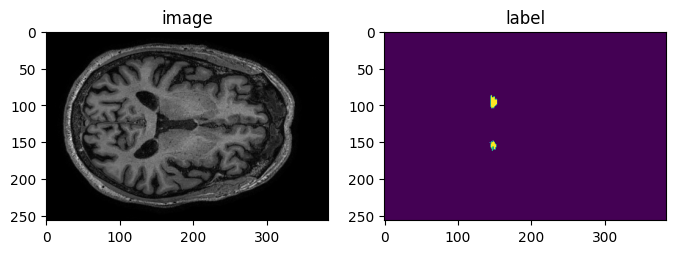

In [28]:
slice = 230
image, label = d_dict["image"], d_dict["label"]
plt.figure("visualize", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, slice ], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, slice])
plt.show()

In [29]:
np.unique(label[:, :, slice])

array([0., 1.], dtype=float32)

In [3]:
train_images = sorted(glob.glob(os.path.join(data_dir, "image_Tr", "*.nii")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "label_Tr", "*.nii")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]


In [4]:
os.path.join(data_dir, "image_Tr", "*.nii")

'/var/data/MONAI_Choroid_Plexus/dataset_aschoplex/image_Tr/*.nii'

In [5]:
from torch.utils.data import DataLoader

In [9]:
loader = LoadImage(dtype=np.float32, image_only=True)

In [12]:
image = loader(data_dict[0]["image"])
print(f"image shape: {image.shape}")
print(f"image affine:\n{image.meta['affine']}")
print(f"image pixdim:\n{image.pixdim}")

image shape: (257, 384, 384)
image affine:
tensor([[  -1.0000,    0.0000,    0.0000,  128.0000],
        [   0.0000,    1.0000,    0.0000, -191.5000],
        [   0.0000,    0.0000,    1.0000, -191.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
image pixdim:
tensor([1., 1., 1.], dtype=torch.float64)


In [14]:
image, label = data_dict["image"], data_dict["label"]
plt.figure("visualize", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, 30], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 30])
plt.show()

TypeError: list indices must be integers or slices, not str

In [7]:
image = loader(data_dicts[0]["image"])
# print(f"input: {train_data_dicts[0]['image']}")
print(f"image shape: {image.shape}")
print(f"image affine:\n{image.meta['affine']}")
print(f"image pixdim:\n{image.pixdim}")

OSError: Expected 303169536 bytes, got 92798624 bytes from /var/data/MONAI_Choroid_Plexus/dataset_aschoplex/image_Tr/0_image.nii
 - could the file be damaged?